In [3]:
from IPython.display import Image

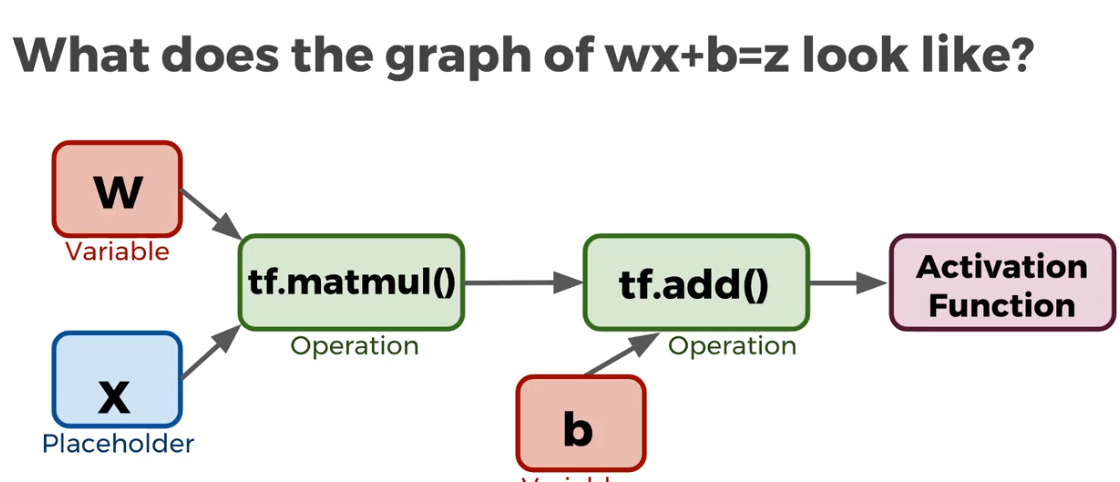

In [6]:
Image(filename="Images/graph.png")

In [7]:
import numpy as np
import tensorflow as tf

In [8]:
np.random.seed(101)
tf.set_random_seed(101)

In [9]:
rand_a = np.random.uniform(0,100,(5,5))

In [10]:
rand_b = np.random.uniform(0,100,(5,1))

In [16]:
print("random a \n",rand_a)
print("random b \n",rand_b)

random a 
 [[ 51.63986277  57.06675869   2.84742265  17.15216562  68.52769817]
 [ 83.38968626  30.69662197  89.36130797  72.15438618  18.99389542]
 [ 55.42275911  35.2131954   18.18924027  78.56017619  96.54832224]
 [ 23.23536618   8.35614337  60.35484223  72.89927573  27.62388285]
 [ 68.53063288  51.78674742   4.84845374  13.78692376  18.69674261]]
random b 
 [[ 99.43179012]
 [ 52.06653967]
 [ 57.87895355]
 [ 73.48190583]
 [ 54.19617722]]


In [17]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [18]:
add_op = a + b

In [19]:
mul_op = a * b

In [27]:
with tf.Session() as sess:
    #add_result = sess.run(add_op,feed_dict={a:10,b:20})
    #remove comment above line and run cell once 
    add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
    print(add_result)
    mul_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
    print("**********\n",mul_result)

[[ 151.07165527  156.49855042  102.27921295  116.58396149  167.95948792]
 [ 135.45622253   82.76316071  141.42784119  124.22093201   71.06043243]
 [ 113.30171204   93.09214783   76.06819153  136.43911743  154.42727661]
 [  96.7172699    81.83804321  133.83674622  146.38117981  101.10578918]
 [ 122.72680664  105.98292542   59.04463196   67.98310089   72.89292145]]
**********
 [[ 5134.64404297  5674.25         283.12432861  1705.47070312
   6813.83154297]
 [ 4341.8125      1598.26696777  4652.73388672  3756.8293457    988.9463501 ]
 [ 3207.8112793   2038.10290527  1052.77416992  4546.98046875
   5588.11572266]
 [ 1707.37902832   614.02526855  4434.98876953  5356.77734375
   2029.85546875]
 [ 3714.09838867  2806.64379883   262.76763916   747.19854736
   1013.29199219]]


#### Neural Network

In [28]:
n_features = 10
n_dense_neurons = 3

In [29]:
x = tf.placeholder(tf.float32,shape=(None,n_features))

In [30]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))

In [31]:
b = tf.Variable(tf.ones([n_dense_neurons]))

In [32]:
xW = tf.matmul(x,W)

In [33]:
z = tf.add(xW,b)

In [34]:
#now pass it into a activation function

In [35]:
a = tf.sigmoid(z)

In [37]:
#time to run
init = tf.global_variables_initializer()

In [38]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [39]:
print(layer_out)

[[ 0.19592889  0.84230143  0.36188066]]


### Simple regression ex

In [54]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([ -0.89943625,   1.74890053,   3.25814891,   2.93927296,
         4.2553848 ,   5.12534855,   5.88587889,   8.2379122 ,
         8.56020649,  10.47334905])

In [55]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label

array([ -0.41317993,   0.68061715,   1.30797702,   4.79527158,
         3.01436092,   5.69979689,   6.84939035,   6.50204184,
        10.06570192,   8.83186873])

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

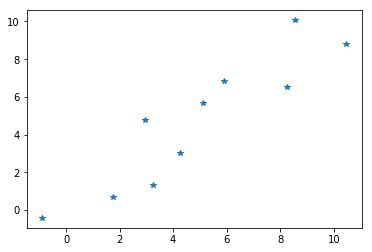

In [57]:
plt.plot(x_data,y_label,"*")

In [58]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [59]:
error = 0
for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [60]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)   #default Learning rate

In [61]:
train = optimizer.minimize(error)

In [62]:
init = tf.global_variables_initializer()

In [74]:
with tf.Session() as sess:
    sess.run(init)
    trainng_steps = 100  #make it maximum as possible to run many times change this value to 100
    for i in range(trainng_steps):
        sess.run(train)
    final_slope,final_intercept = sess.run([m,b])

In [75]:
x_test = np.linspace(-1,11,10)
#y = mx + b
y_pred_plot = final_slope*x_test + final_intercept

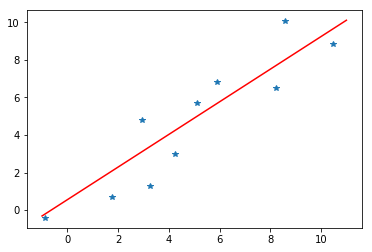

In [76]:
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,"*")
plt.show()